Kita akan mengklaster atau mengelompokkan penghabisan waktu dengan fitur age, annual income

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objs as go
import json
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans



data = pd.read_csv('/Users/erwinqodariyah/Documents/SEMESTER 3 /Machine Learning/Dataset/E-commerce.csv')
data

,Customer ID,Age,Gender,Location,Annual Income,Purchase History,Browsing History,Product Reviews,Time on Site
0,1001,25,Female,City D,45000,"[{""Date"": ""2022-03-05"", ""Category"": ""Clothing""...","[{""Timestamp"": ""2022-03-10T14:30:00Z""}, {""Time...","Great pair of jeans, very comfortable. Rating:...",32.50
1,1001,28,Female,City D,52000,"[{""Product Category"": ""Clothing"", ""Purchase Da...","[{""Product Category"": ""Home & Garden"", ""Timest...",Great customer service!,123.45
2,1001,28,Female,City D,65000,"[{""Product Category"": ""Electronics"", ""Purchase...","[{""Product Category"": ""Clothing"", ""Timestamp"":...",Great electronics. The sound quality is excell...,125.60
3,1001,45,Female,City D,70000,"{'Purchase Date': '2022-08-15', 'Product Categ...",{'Timestamp': '2022-09-03 14:30:00'},"{""Product 1"": {""Rating"": 4, ""Review"": ""Great e...",327.60
4,1002,34,Male,City E,45000,"{'Purchase Date': '2022-07-25', 'Product Categ...",{'Timestamp': '2022-08-10 17:15:00'},"{""Product 1"": {""Rating"": 3, ""Review"": ""Good pr...",214.90
5,1003,56,Other,City F,90000,"{'Purchase Date': '2022-09-01', 'Product Categ...",{'Timestamp': '2022-06-25 10:45:00'},"{""Product 1"": {""Rating"": 5, ""Review"": ""Awesome...",486.30
6,1004,29,Female,City G,60000,"{'Purchase Date': '2022-07-20', 'Product Categ...",{'Timestamp': '2022-08-15 13:20:00'},"{""Product 1"": {""Rating"": 4, ""Review"": ""Great p...",378.50
7,1005,42,Male,City H,75000,"{'Purchase Date': '2022-08-28', 'Product Categ...",{'Timestamp': '2022-09-12 16:35:00'},"{""Product 1"": {""Rating"": 3, ""Review"": ""Good pr...",289.80
8,1006,51,Other,City I,85000,"{'Purchase Date': '2022-09-05', 'Product Categ...",{'Timestamp': '2022-06-28 09:00:00'},"{""Product 1"": {""Rating"": 5, ""Review"": ""Outstan...",456.20
9,1007,36,Female,City J,55000,"{'Purchase Date': '2022-07-27', 'Product Categ...",{'Timestamp': '2022-08-17 14:50:00'},"{""Product 1"": {""Rating"": 4, ""Review"": ""Good pr...",334.90


In [3]:
data['Browsing History']

0     [{"Timestamp": "2022-03-10T14:30:00Z"}, {"Time...
1     [{"Product Category": "Home & Garden", "Timest...
2     [{"Product Category": "Clothing", "Timestamp":...
3                  {'Timestamp': '2022-09-03 14:30:00'}
4                  {'Timestamp': '2022-08-10 17:15:00'}
5                  {'Timestamp': '2022-06-25 10:45:00'}
6                  {'Timestamp': '2022-08-15 13:20:00'}
7                  {'Timestamp': '2022-09-12 16:35:00'}
8                  {'Timestamp': '2022-06-28 09:00:00'}
9                  {'Timestamp': '2022-08-17 14:50:00'}
10                 {'Timestamp': '2022-06-30 11:15:00'}
11                 {'Timestamp': '2022-09-14 10:00:00'}
12                 {'Timestamp': '2022-03-06 14:30:00'}
13                 {'Timestamp': '2022-05-12 16:15:00'}
14                 {'Timestamp': '2022-06-03 10:45:00'}
15                 {'Timestamp': '2022-07-08 13:00:00'}
16                 {'Timestamp': '2022-08-04 09:30:00'}
17                 {'Timestamp': '2022-09-02 11:

In [4]:
#cek tipe data untuk tahu perlakuan pada EDA dan Klustering
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer ID       50 non-null     int64  
 1   Age               50 non-null     int64  
 2   Gender            50 non-null     object 
 3   Location          50 non-null     object 
 4   Annual Income     50 non-null     int64  
 5   Purchase History  50 non-null     object 
 6   Browsing History  50 non-null     object 
 7   Product Reviews   50 non-null     object 
 8   Time on Site      50 non-null     float64
dtypes: float64(1), int64(3), object(5)
memory usage: 3.6+ KB


In [5]:
del data['Customer ID']

In [6]:
data['Age'] = data['Age'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               50 non-null     int64  
 1   Gender            50 non-null     object 
 2   Location          50 non-null     object 
 3   Annual Income     50 non-null     int64  
 4   Purchase History  50 non-null     object 
 5   Browsing History  50 non-null     object 
 6   Product Reviews   50 non-null     object 
 7   Time on Site      50 non-null     float64
dtypes: float64(1), int64(2), object(5)
memory usage: 3.3+ KB


In [7]:
print(data['Age'].dtypes)

int64


In [8]:
#cek data missing value
data.isnull().sum()

Age                 0
Gender              0
Location            0
Annual Income       0
Purchase History    0
Browsing History    0
Product Reviews     0
Time on Site        0
dtype: int64

In [9]:
#cek ada berapa nilai unik
data.nunique()

Age                 22
Gender               3
Location            16
Annual Income       17
Purchase History    50
Browsing History    50
Product Reviews     47
Time on Site        32
dtype: int64

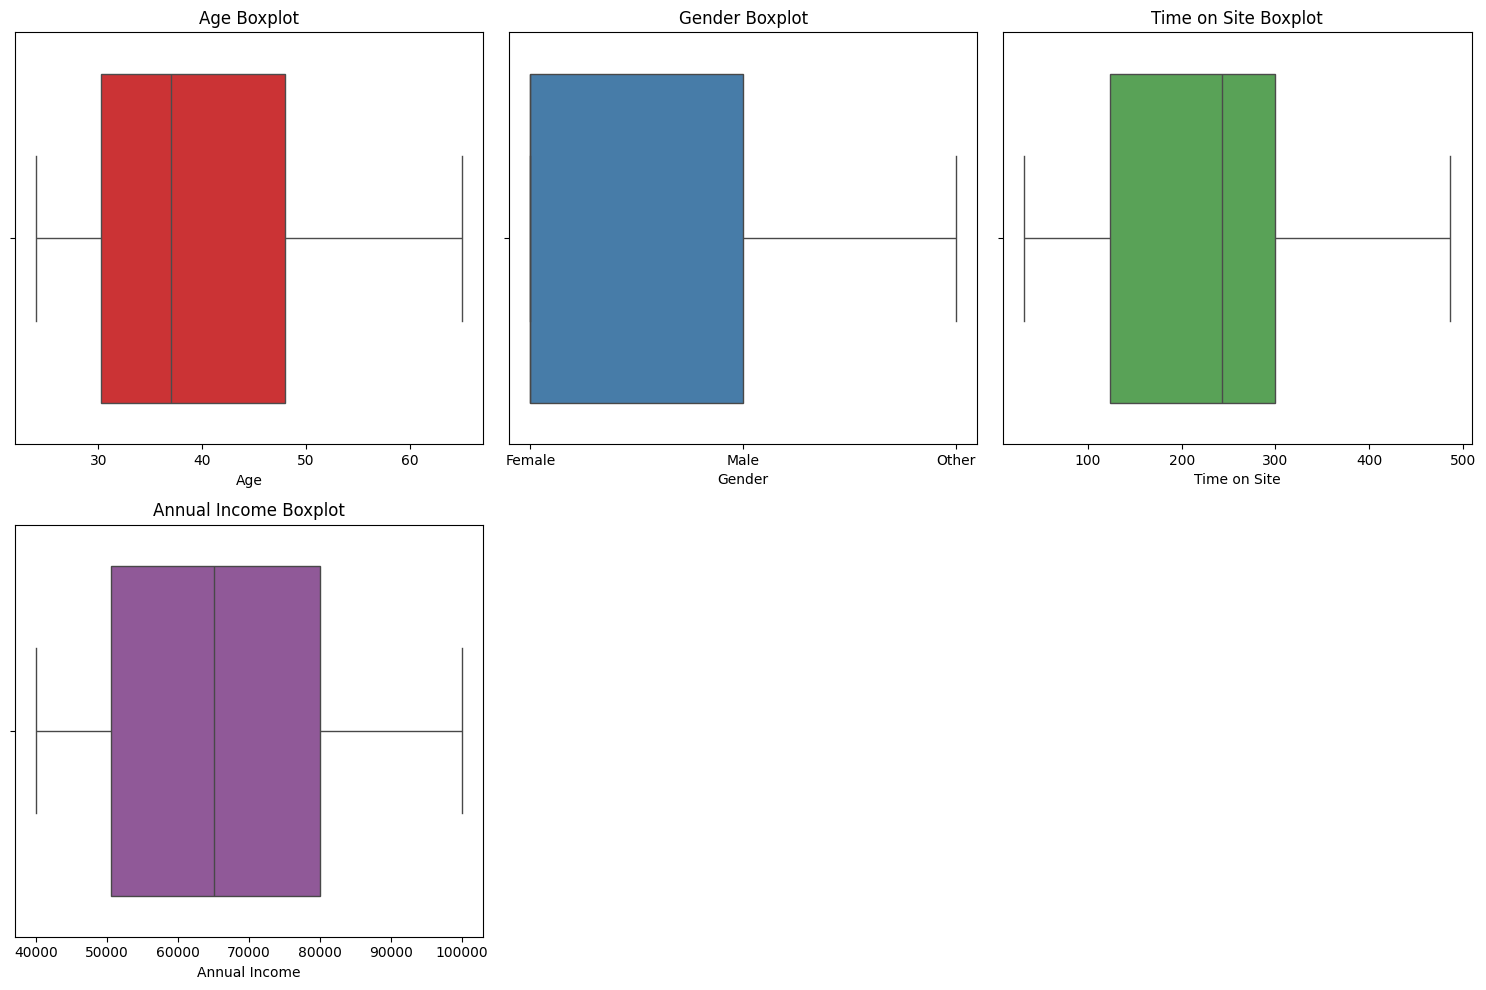

In [10]:

kolom_1 = ['Age', 'Gender', 'Time on Site', 'Annual Income']

color_palette = sns.color_palette("Set1", len(kolom_1))
plt.figure(figsize = (15, 10))

for i, column in enumerate(kolom_1, 1):
    plt.subplot((len(kolom_1)//3)+1, 3, i)
    sns.boxplot(data=data, x=column, color=color_palette[i - 1])
    plt.xlabel(column)
    plt.title(f'{column} Boxplot')

plt.tight_layout()
plt.show()

In [11]:
data['Pendapatan_Norm'] = (data['Annual Income'] - data['Annual Income'].min()) / (data['Annual Income'].max() - data['Annual Income'].min()) * 100

Karena boxplot pada fitur gender kurang bagus saya mencoba untuk ngasi tahu berapa banyak gender pada dataset tersebut

<Figure size 2000x1000 with 0 Axes>

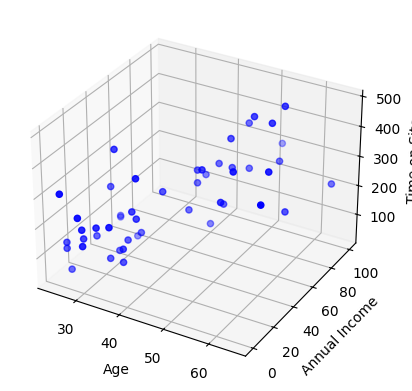

In [12]:
# kita akan menampilkan gender,annual income, dan screen on site
plt.figure(figsize = (20, 10))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = data['Age']
y = data['Pendapatan_Norm']
z = data['Time on Site']

ax.scatter(x, y, z, c='b', marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Time on Site')

plt.ion()
plt.show()

In [13]:
fitur = ["Age","Annual Income","Time on Site"]
fig = go.Figure(data=[go.Scatter3d(
    x=data['Age'],
    y=data['Pendapatan_Norm'],
    z=data['Time on Site'],
    mode='markers'
)])

fig.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Annual Income',
        zaxis_title='Time on Site'
    )
)

fig.show()
# Selanjutnya, kita hanya akan menggunakan data dengan kolom_2

data_train = data[fitur]
data_train

,Age,Annual Income,Time on Site
0,25,45000,32.50
1,28,52000,123.45
2,28,65000,125.60
3,45,70000,327.60
4,34,45000,214.90
5,56,90000,486.30
6,29,60000,378.50
7,42,75000,289.80
8,51,85000,456.20
9,36,55000,334.90


K-Means Algorithm

In [14]:
# Sekarang kita coba clustering data menggunakan KMeans
# Tapi sebelum itu, kita tentukan nilai K yang paling optimum dengan Elbow Method dan Silhouette Score
wcss = []
scores = []
for i in range(2, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km.fit(data_train)
    wcss.append(km.inertia_)

    labels = km.labels_
    silhouette_avg = silhouette_score(data_train, labels)
    scores.append(silhouette_avg)
    print('wcss score for n_cluster = ' + str(i) + ' is ' + str(wcss))
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))

wcss score for n_cluster = 2 is [3706427017.0088487]
silhoutte score for n_clusters = 2 is 0.6093933492267868
wcss score for n_cluster = 3 is [3706427017.0088487, 1579515148.3019638]
silhoutte score for n_clusters = 3 is 0.595170404424415
wcss score for n_cluster = 4 is [3706427017.0088487, 1579515148.3019638, 994806753.8105774]
silhoutte score for n_clusters = 4 is 0.5891003924798821
wcss score for n_cluster = 5 is [3706427017.0088487, 1579515148.3019638, 994806753.8105774, 547344197.7648333]
silhoutte score for n_clusters = 5 is 0.6130111634050656
wcss score for n_cluster = 6 is [3706427017.0088487, 1579515148.3019638, 994806753.8105774, 547344197.7648333, 361660357.2166389]
silhoutte score for n_clusters = 6 is 0.6086304875968803
wcss score for n_cluster = 7 is [3706427017.0088487, 1579515148.3019638, 994806753.8105774, 547344197.7648333, 361660357.2166389, 257847772.85241267]
silhoutte score for n_clusters = 7 is 0.6409029864022255
wcss score for n_cluster = 8 is [3706427017.008848

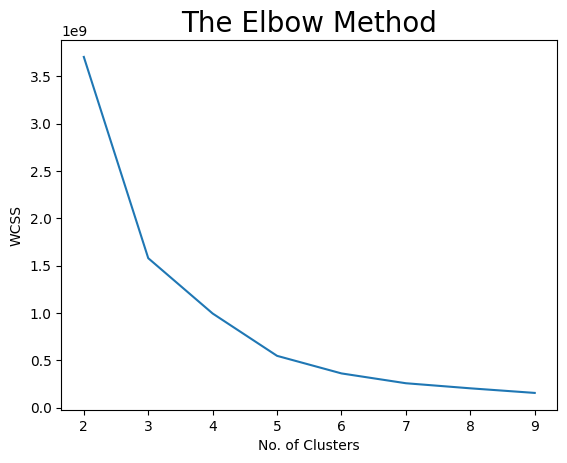

In [15]:
# Visualisasi Elbow Method
plt.plot(range(2, 10), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

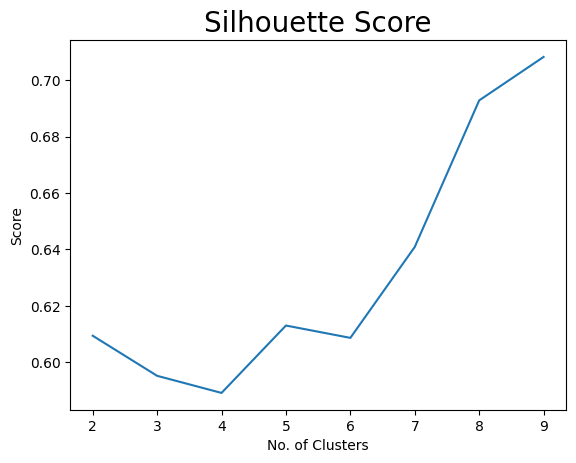

In [16]:
# Visualisasi Silhouette Score
plt.plot(range(2, 10), scores)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

In [17]:
# Dari Elbow Method dan Sillhouette Score, kita akan menggunakan K = 4
kmeansmodel = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans= kmeansmodel.fit_predict(data_train)

In [18]:
import plotly.graph_objects as go

# Scatter plots for each cluster
trace1 = go.Scatter3d(
    x=data_train[y_kmeans == 0].iloc[:, 0],
    y=data_train[y_kmeans == 0].iloc[:, 1],
    z=data_train[y_kmeans == 0].iloc[:, 2],
    mode='markers',
    marker=dict(size=8, color='red', opacity=0.8),
    name='Cluster 1'
)

trace2 = go.Scatter3d(
    x=data_train[y_kmeans == 1].iloc[:, 0],
    y=data_train[y_kmeans == 1].iloc[:, 1],
    z=data_train[y_kmeans == 1].iloc[:, 2],
    mode='markers',
    marker=dict(size=8, color='blue', opacity=0.8),
    name='Cluster 2'
)

trace3 = go.Scatter3d(
    x=data_train[y_kmeans == 2].iloc[:, 0],
    y=data_train[y_kmeans == 2].iloc[:, 1],
    z=data_train[y_kmeans == 2].iloc[:, 2],
    mode='markers',
    marker=dict(size=8, color='green', opacity=0.8),
    name='Cluster 3'
)

trace4 = go.Scatter3d(
    x=data_train[y_kmeans == 3].iloc[:, 0],
    y=data_train[y_kmeans == 3].iloc[:, 1],
    z=data_train[y_kmeans == 3].iloc[:, 2],
    mode='markers',
    marker=dict(size=8, color='purple', opacity=0.8),
    name='Cluster 4'
)

# Scatter plot for centroids
centroids = go.Scatter3d(
    x=kmeansmodel.cluster_centers_[:, 0],
    y=kmeansmodel.cluster_centers_[:, 1],
    z=kmeansmodel.cluster_centers_[:, 2],
    mode='markers',
    marker=dict(size=12, color='black', symbol='diamond', opacity=1),
    name='Centroids'
)

# Layout
layout = go.Layout(
    title='Hasil KMeans Clustering',
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Annual Income',
        zaxis_title='Time on Site'
    ),
    showlegend=True
)

# Combine all traces
fig = go.Figure(data=[trace1, trace2, trace3, trace4, centroids], layout=layout)

# Display plot
fig.show()


In [19]:
# Fungsi untuk menghitung jumlah pembelian (frekuensi) dalam Purchase History
def count_purchases(purchase_history):
    # Mengganti kutip tunggal dengan kutip ganda jika ada
    purchase_history = purchase_history.replace("'", '"')
    
    try:
        # Mengubah string JSON menjadi list
        purchase_list = json.loads(purchase_history)
        return len(purchase_list)
    except json.JSONDecodeError as e:
        return 0

# Terapkan fungsi ke kolom Purchase History dan simpan hasilnya ke kolom baru
data['Frekuensi Purchase History'] = data['Purchase History'].apply(count_purchases)

# Simpan dataframe hasil ke file baru jika diperlukan
data.to_csv('E-commerce_with_frequencies.csv', index=False)


<Axes: >

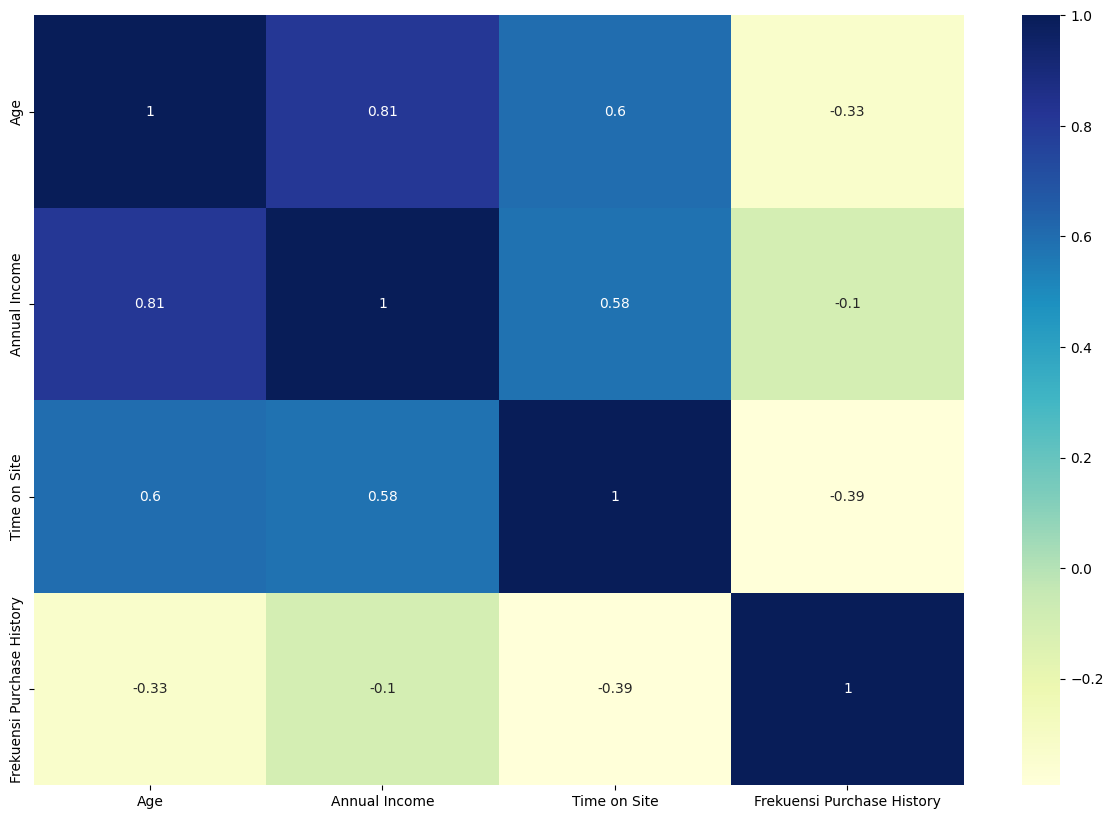

In [23]:
#Kita cek korelasi matrixnya semakin mendekati 1 maka korelasi naik yang artinya semakin annual income naik maka umur juga semakin naik
col_box = ["Age","Annual Income","Time on Site","Frekuensi Purchase History"]
plt.figure(figsize=(15,10))
sns.heatmap(data[col_box].corr(), cmap="YlGnBu", annot=True)

In [21]:
data['Age Rank'] = data['Age'].rank(ascending=False)  # Peringkat usia dari tertua ke termuda
data['Income Rank'] = data['Annual Income'].rank(ascending=False)  # Peringkat pendapatan dari tertinggi ke terendah
data['TimeOnSite Rank'] = data['Time on Site'].rank(ascending=False)  # Peringkat waktu di situs dari terbanyak ke tersedikit
data['Frekuensi Purchase History Rank'] = data['Frekuensi Purchase History'].rank(ascending=False) # Peringkat frekuensi pembelian dari terbanyak ke tersedikit 

# Menampilkan DataFrame dengan peringkat baru
print(data[['Age', 'Annual Income', 'Time on Site','Frekuensi Purchase History', 'Age Rank', 'Income Rank', 'TimeOnSite Rank','Frekuensi Purchase History Rank']].head())


   Age  Annual Income  Time on Site  Frekuensi Purchase History  Age Rank  \
0   25          45000         32.50                           3      47.5   
1   28          52000        123.45                           2      44.0   
2   28          65000        125.60                           2      44.0   
3   45          70000        327.60                           0      17.5   
4   34          45000        214.90                           0      32.5   

   Income Rank  TimeOnSite Rank  Frekuensi Purchase History Rank  
0         43.5             50.0                              3.0  
1         37.0             39.0                             10.5  
2         26.0             37.0                             10.5  
3         21.0             10.0                             34.0  
4         43.5             28.0                             34.0  


Insight yang bisa kita dapat adalah

1. Semakin rendah umur maka semakin kecil pendapatan dan semakin kecil waktu di e-commerce namun juga semakin besar pembelian
2. Semakin tinggi umur maka semakin besar pendapatan dan semakin banyak waktu di e-commerce namun pembelian semakin kecil

kesimpulannya adalah mungkin ketika kita masih muda maka kita suka belanja padahal duit masih pas pas an tapi ketika sudah semakin dewasa cukup hanya melihat di etalase tanpa harus memilikinya sudah menjadi kebiasaannya xixiixxi 

SEKIAN ARIGATOOO